
Peak Fitting Results:

Peak 1 (Position: 335.27 ± 0.20):
Amplitude: 0.060 ± 0.001
Width: 48.11 ± 0.58 in ppm
Width: 3262.12 ± 39.04 in Hz
Eta: 0.00 ± 0.06
Offset: -1330.272 ± 1677.270
Gaussian Area: 3.08 ± 0.20
Lorentzian Area: 0.00 ± 0.27
Total Area: 3.08 ± 0.34
--------------------------------------------------

Peak 2 (Position: 431.07 ± 0.18):
Amplitude: 0.222 ± 0.004
Width: 57.05 ± 0.60 in ppm
Width: 3868.46 ± 40.55 in Hz
Eta: 0.45 ± 0.02
Offset: 9218.542 ± 26125.975
Gaussian Area: 7.41 ± 0.35
Lorentzian Area: 8.96 ± 0.51
Total Area: 16.37 ± 0.62
--------------------------------------------------

Peak 3 (Position: 497.27 ± 0.20):
Amplitude: 0.123 ± 0.013
Width: 37.68 ± 1.77 in ppm
Width: 2555.10 ± 120.30 in Hz
Eta: 0.37 ± 0.10
Offset: 509.053 ± 669.457
Gaussian Area: 3.11 ± 0.59
Lorentzian Area: 2.69 ± 0.76
Total Area: 5.80 ± 0.96
--------------------------------------------------

Peak 4 (Position: 581.10 ± 0.20):
Amplitude: 0.079 ± 0.023
Width: 27.86 ± 4.26 in ppm
Width: 1888.

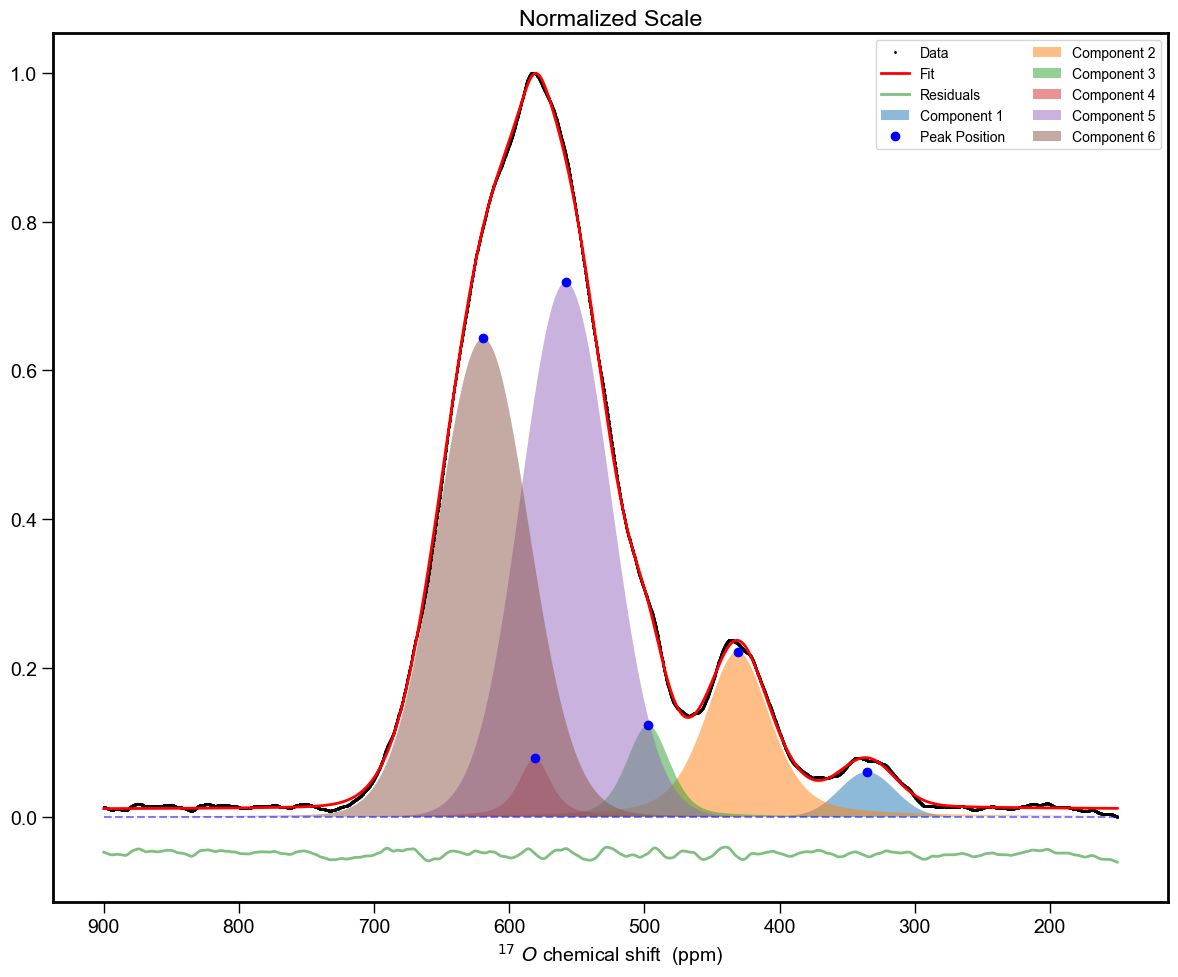

In [3]:
from nmrlineshapeanalyser.core import NMRProcessor

#create NMRProcessor object

processor = NMRProcessor()

#Load filepath
filepath = r"..\data\six_peaks\5\pdata\1"


# Load the data

processor.load_data(filepath)

#Select the region of interest

x_data, y_data = processor.select_region(150, 900)

#Normalize the data and return normalised y_axis and the corresponding x_axis

x_data, y_normalized = processor.normalize_data(x_data, y_data)

#define initial parameters for the fitting
#this example is for a single peak
#format of the parameters is [x0, amplitude, width, eta, offset]
# x0 (position), amplitude, width, eta (mixing parameter), offset
#x0 has to be close to the peak position
initial_params = [
                  334, 0.12, 40.51, 0.89, -143.115, 
                  430, 0.12, 40.51, 0.89, -143.115,
                  497, 0.219, 55.43, 0.52, -143.115,
                  562, 0.12, 40.51, 0.89, -143.115,
                  581, 0.219, 55.43, 0.52, -143.155,
                  623, 0.12, 40.51, 0.89, -143.115
                  ]

# fixed_x0 controls whether peak positions should be fixed during fitting
# False means position can vary, True means position is fixed
fixed_x0 = [False]*6

#FIt the data
popt, metrics, fitted = processor.fit_peaks(x_data, y_normalized, initial_params, fixed_x0)

#popt is the optimized parameters
#metrics is the metrics of the fitting
#fitted is the fitted curve data

#Plot and examine the results of the fitting
fig, axes, components = processor.plot_results(x_data, y_normalized, fitted, metrics, popt)

#Save the figure as an svg file and the results as a csv file
processor.save_results(filepath, x_data, y_normalized, fitted, metrics, popt, components)